<a href="https://colab.research.google.com/github/bbberylll/ESAA/blob/main/esaa_miniproject2_mypart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ESAA/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA/test.csv')

In [ ]:
print(train.head())
print(train.info())

   index  quality  fixed acidity  volatile acidity  citric acid  \
0      0        5            5.6             0.695         0.06   
1      1        5            8.8             0.610         0.14   
2      2        5            7.9             0.210         0.39   
3      3        6            7.0             0.210         0.31   
4      4        6            7.8             0.400         0.26   

   residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0             6.8      0.042                  9.0                  84.0   
1             2.4      0.067                 10.0                  42.0   
2             2.0      0.057                 21.0                 138.0   
3             6.0      0.046                 29.0                 108.0   
4             9.5      0.059                 32.0                 178.0   

   density    pH  sulphates  alcohol   type  
0  0.99432  3.44       0.44     10.2  white  
1  0.99690  3.19       0.59      9.5    red  
2  0.991

In [ ]:
test.head()

index  fixed acidity  volatile acidity  citric acid  residual sugar  \
0      0            9.0              0.31         0.48             6.6   
1      1           13.3              0.43         0.58             1.9   
2      2            6.5              0.28         0.27             5.2   
3      3            7.2              0.15         0.39             1.8   
4      4            6.8              0.26         0.26             2.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.043                 11.0                  73.0  0.99380  2.90   
1      0.070                 15.0                  40.0  1.00040  3.06   
2      0.040                 44.0                 179.0  0.99480  3.19   
3      0.043                 21.0                 159.0  0.99480  3.52   
4      0.019                 23.5                  72.0  0.99041  3.16   

   sulphates  alcohol   type  
0       0.38     11.6  white  
1       0.49      9.0    red  
2       0.69      9.4  white  
3       0.47     10.0  white  
4       0.47     11.8  white

In [ ]:
## 전처리
## index drop
## type, quality 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['quality'] = encoder.fit_transform(train['quality'])
train['type'] = encoder.fit_transform(train['type'])

train.drop('index', axis=1, inplace=True)

encoder2 = LabelEncoder()
test['type'] = encoder2.fit_transform(test['type'])

test.drop('index', axis=1, inplace=True)

In [ ]:
print(encoder.classes_)
train.head()

['red' 'white']


quality  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        2            5.6             0.695         0.06             6.8   
1        2            8.8             0.610         0.14             2.4   
2        2            7.9             0.210         0.39             2.0   
3        3            7.0             0.210         0.31             6.0   
4        3            7.8             0.400         0.26             9.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.042                  9.0                  84.0  0.99432  3.44   
1      0.067                 10.0                  42.0  0.99690  3.19   
2      0.057                 21.0                 138.0  0.99176  3.05   
3      0.046                 29.0                 108.0  0.99390  3.26   
4      0.059                 32.0                 178.0  0.99550  3.04   

   sulphates  alcohol  type  
0       0.44     10.2     1  
1       0.59      9.5     0  
2       0.52     10.9     1  
3       0.50     10.8     1  
4       0.43     10.9     1

In [ ]:
test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            9.0              0.31         0.48             6.6      0.043   
1           13.3              0.43         0.58             1.9      0.070   
2            6.5              0.28         0.27             5.2      0.040   
3            7.2              0.15         0.39             1.8      0.043   
4            6.8              0.26         0.26             2.0      0.019   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  73.0  0.99380  2.90       0.38   
1                 15.0                  40.0  1.00040  3.06       0.49   
2                 44.0                 179.0  0.99480  3.19       0.69   
3                 21.0                 159.0  0.99480  3.52       0.47   
4                 23.5                  72.0  0.99041  3.16       0.47   

   alcohol  type  
0     11.6     1  
1      9.0     0  
2      9.4     1  
3     10.0     1  
4     11.8     1

In [ ]:
## 단위 통일
from sklearn.preprocessing import MinMaxScaler

train_scaled = train.copy()
train_scaled.drop('quality', axis=1, inplace = True)
train_scaled2 = train_scaled.copy()

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_scaled)

train_scaled = pd.DataFrame(train_scaled, columns = train_scaled2.columns)
train_scaled['quality'] = train['quality']
train_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.148760          0.410000     0.036145        0.095092   0.054908   
1       0.413223          0.353333     0.084337        0.027607   0.096506   
2       0.338843          0.086667     0.234940        0.021472   0.079867   
3       0.264463          0.086667     0.186747        0.082822   0.061564   
4       0.330579          0.213333     0.156627        0.136503   0.083195   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.027778              0.179724  0.139001  0.551181   0.123596   
1             0.031250              0.082949  0.188741  0.354331   0.207865   
2             0.069444              0.304147  0.089647  0.244094   0.168539   
3             0.097222              0.235023  0.130904  0.409449   0.157303   
4             0.107639              0.396313  0.161751  0.236220   0.117978   

    alcohol  type  quality  
0  0.318841   1.0        2  
1  0.217391   0.0        2  
2  0.420290   1.0        2  
3  0.405797   1.0        3  
4  0.420290   1.0        3

In [ ]:
corr = train_scaled.corr()
corr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.210180     0.326992   
volatile acidity           0.210180          1.000000    -0.377986   
citric acid                0.326992         -0.377986     1.000000   
residual sugar            -0.112544         -0.192677     0.135160   
chlorides                  0.303307          0.385431     0.029121   
free sulfur dioxide       -0.277079         -0.352572     0.129496   
total sulfur dioxide      -0.323845         -0.418535     0.190955   
density                    0.452161          0.266759     0.088400   
pH                        -0.250462          0.264130    -0.322100   
sulphates                  0.300979          0.225174     0.049013   
alcohol                   -0.096274         -0.032897    -0.005376   
type                      -0.483644         -0.652362     0.189211   
quality                   -0.076506         -0.261557     0.079157   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.112544   0.303307            -0.277079   
volatile acidity           -0.192677   0.385431            -0.352572   
citric acid                 0.135160   0.029121             0.129496   
residual sugar              1.000000  -0.130339             0.396018   
chlorides                  -0.130339   1.000000            -0.193143   
free sulfur dioxide         0.396018  -0.193143             1.000000   
total sulfur dioxide        0.494788  -0.281654             0.716829   
density                     0.557183   0.364200             0.027270   
pH                         -0.259673   0.046937            -0.145586   
sulphates                  -0.182275   0.400354            -0.189390   
alcohol                    -0.361457  -0.259774            -0.182321   
type                        0.346199  -0.518834             0.468305   
quality                    -0.032848  -0.198148             0.055574   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.323845  0.452161 -0.250462   0.300979   
volatile acidity                 -0.418535  0.266759  0.264130   0.225174   
citric acid                       0.190955  0.088400 -0.322100   0.049013   
residual sugar                    0.494788  0.557183 -0.259673  -0.182275   
chlorides                        -0.281654  0.364200  0.046937   0.400354   
free sulfur dioxide               0.716829  0.027270 -0.145586  -0.189390   
total sulfur dioxide              1.000000  0.039707 -0.234412  -0.272236   
density                           0.039707  1.000000  0.020047   0.261879   
pH                               -0.234412  0.020047  1.000000   0.187392   
sulphates                        -0.272236  0.261879  0.187392   1.000000   
alcohol                          -0.271566 -0.688053  0.114959  -0.008713   
type                              0.699765 -0.388293 -0.329762  -0.486080   
quality                          -0.039732 -0.299831  0.017931   0.042068   

                       alcohol      type   quality  
fixed acidity        -0.096274 -0.483644 -0.076506  
volatile acidity     -0.032897 -0.652362 -0.261557  
citric acid          -0.005376  0.189211  0.079157  
residual sugar       -0.361457  0.346199 -0.032848  
chlorides            -0.259774 -0.518834 -0.198148  
free sulfur dioxide  -0.182321  0.468305  0.055574  
total sulfur dioxide -0.271566  0.699765 -0.039732  
density              -0.688053 -0.388293 -0.299831  
pH                    0.114959 -0.329762  0.017931  
sulphates            -0.008713 -0.486080  0.042068  
alcohol               1.000000  0.034006  0.439615  
type                  0.034006  1.000000  0.118280  
quality               0.439615  0.118280  1.000000

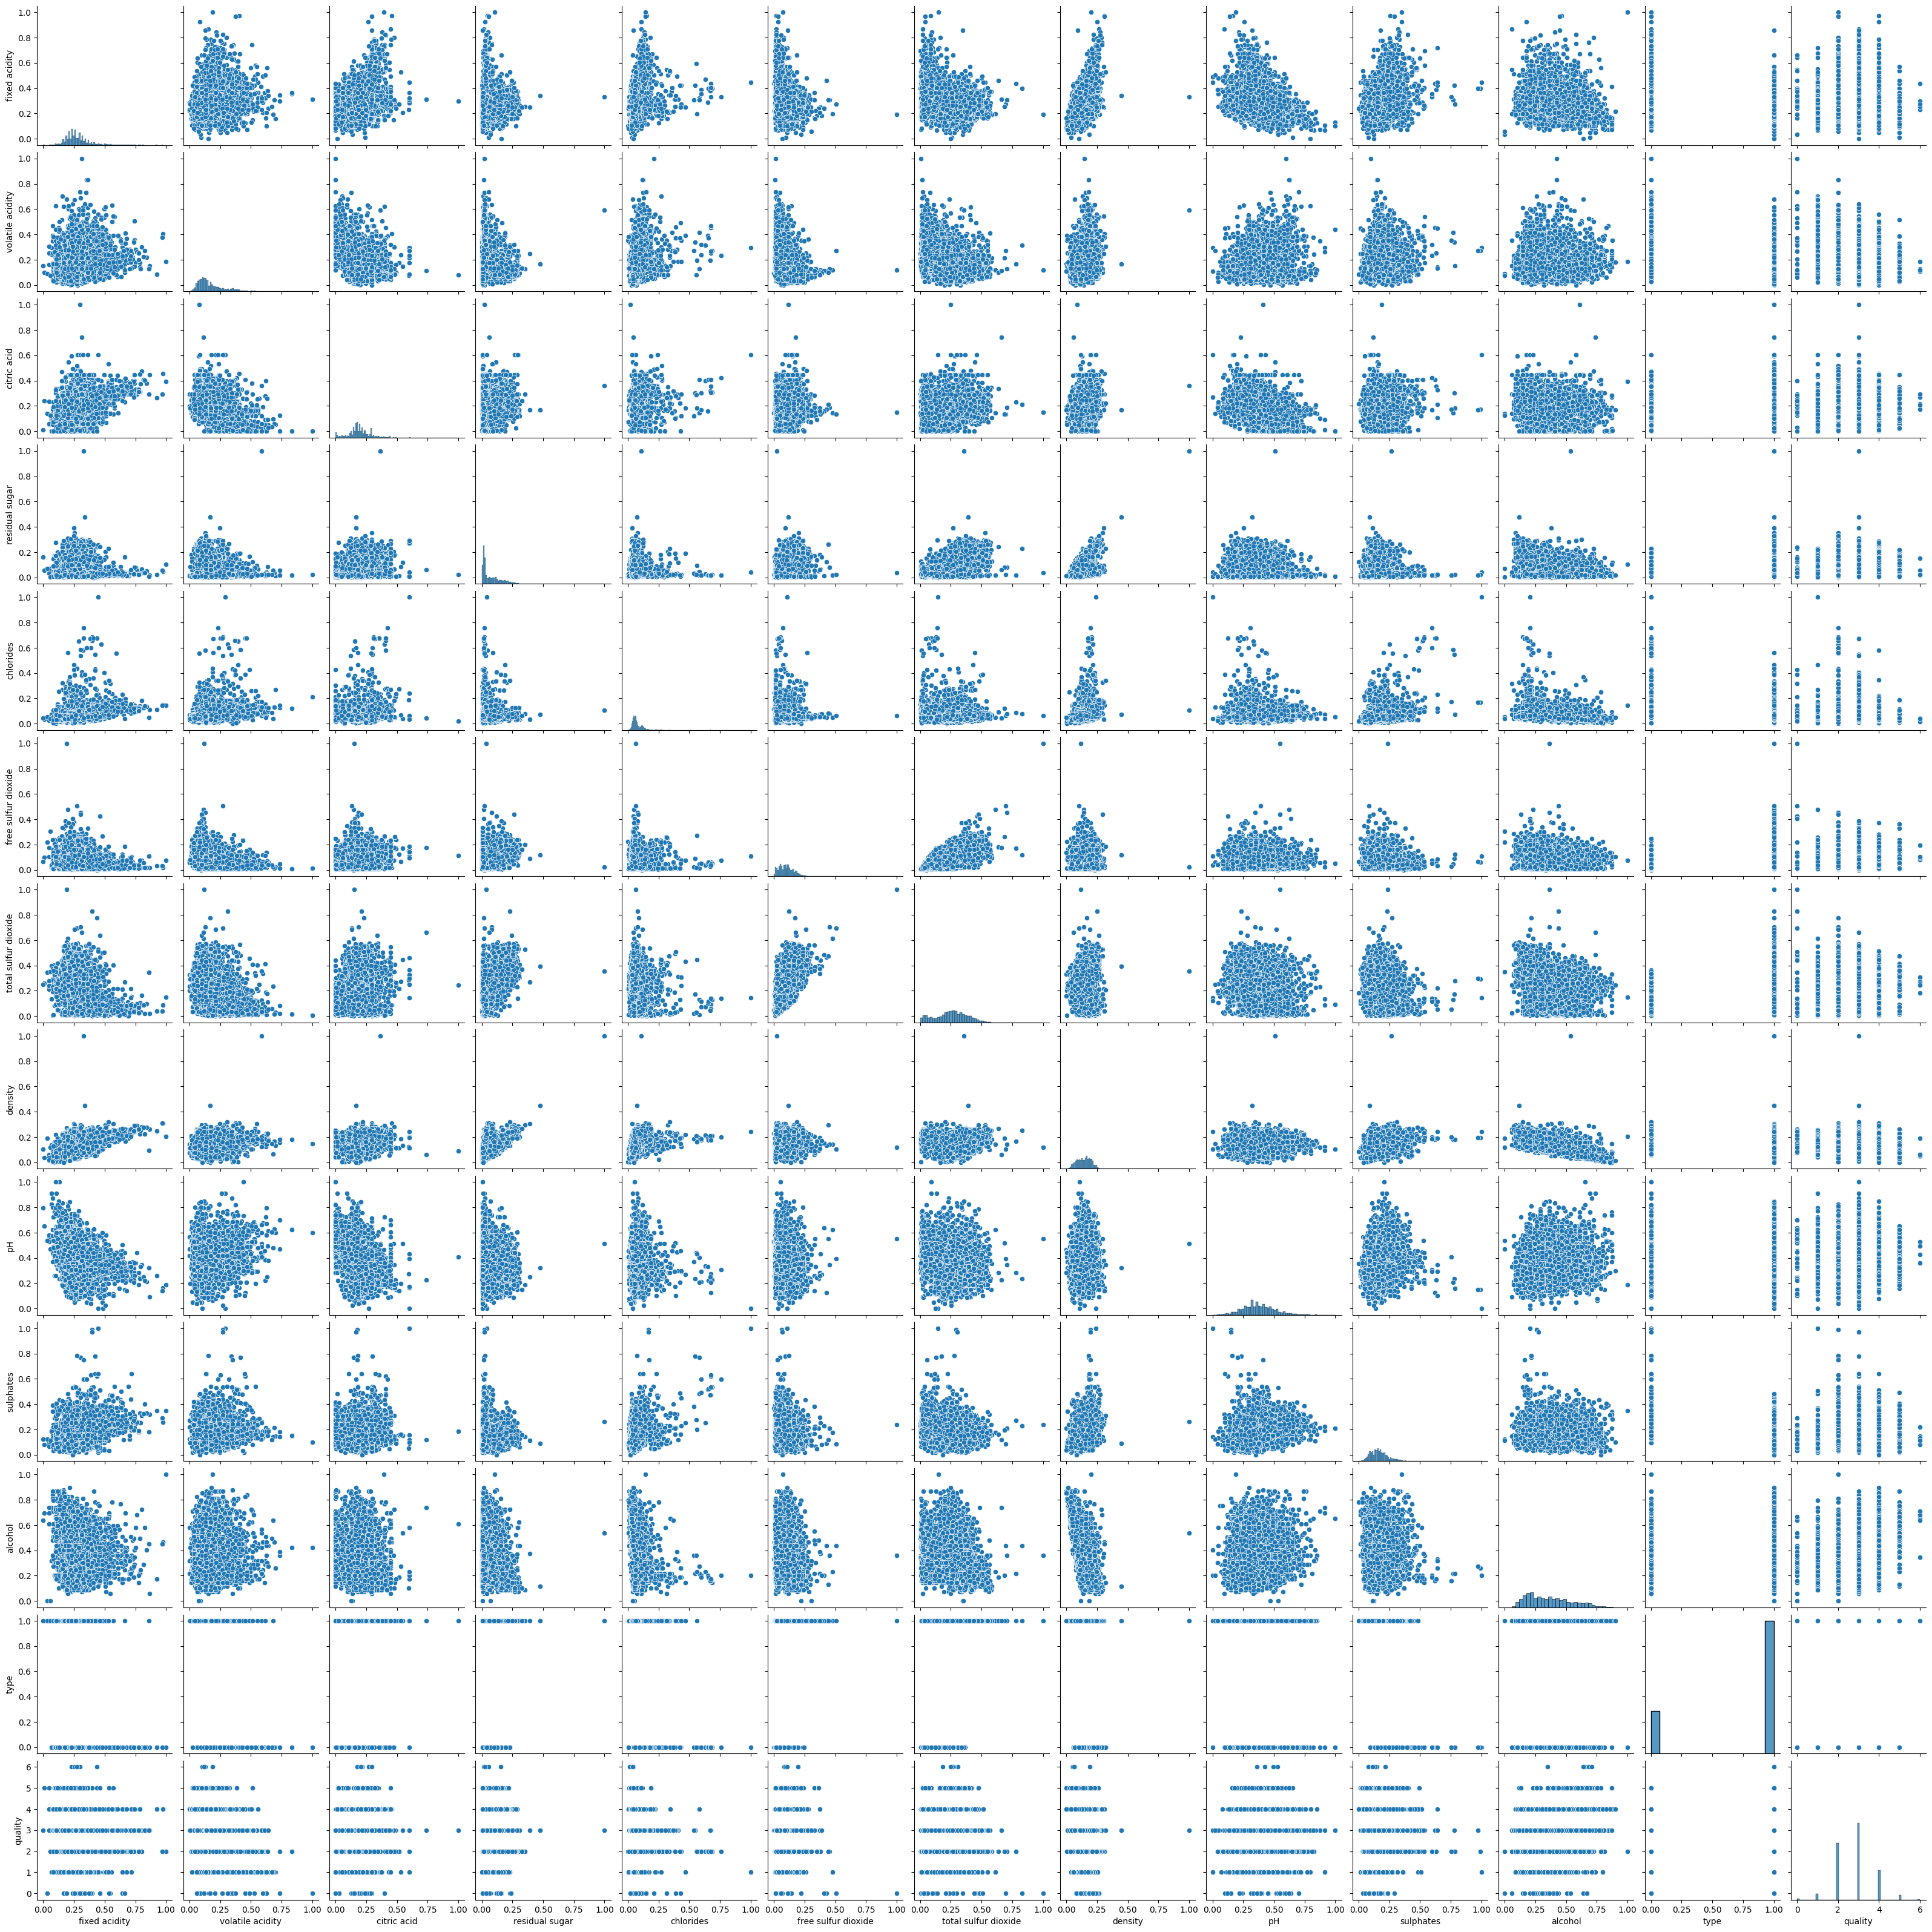

In [ ]:
sns.pairplot(train_scaled)
plt.show()

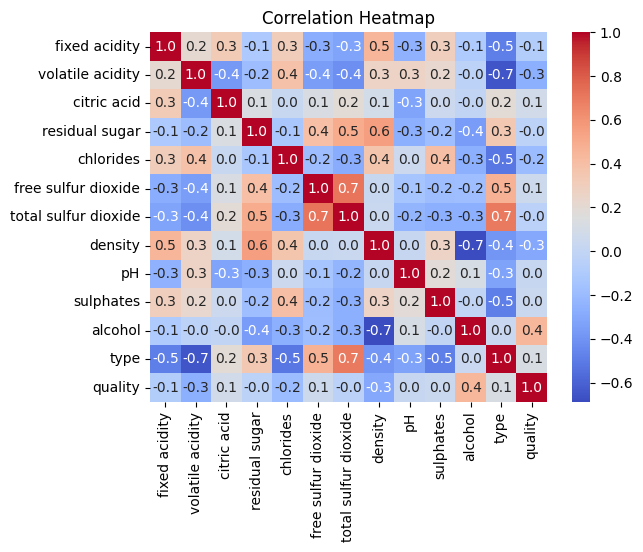

In [ ]:
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
## 데이터 분리

X_train = train.drop('quality', axis=1)
y_train = train['quality']

X_test = test

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

rf = RandomForestClassifier(random_state=156)
xgb = XGBClassifier(random_state = 156, use_label_encoder=False, eval_metric = 'mlogloss')
lgbm = LGBMClassifier(random_state=156)

In [ ]:
from sklearn.model_selection import cross_val_score

for model, name in zip([rf, xgb, lgbm], ['RandomForest', 'XGBoost', 'LightGBM']):
  scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
  print(f"{name} 평균 정확도 : {scores.mean()}")



RandomForest 평균 정확도 : 0.6689061129952851


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:42:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:42:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:42:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:42:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:42:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost 평균 정확도 : 0.6568999917280172
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1484
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.391465
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.821849
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
from sklearn.model_selection import GridSearchCV

## RandomForest 내용

params_rf = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("RF 최적 파라미터:", grid_rf.best_params_)

RF 최적 파라미터: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

## XGB 내용

params_xgb = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

random_xgb = RandomizedSearchCV(xgb, param_distributions=params_xgb, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=156)
random_xgb.fit(X_train, y_train)

print("XGB 최적 파라미터:", random_xgb.best_params_)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:01:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGB 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 162, 'subsample': 0.8}


In [ ]:
## LGBM 내용

params_lgbm = {
    'n_estimators': randint(100, 400),
    'num_leaves': randint(20, 100),
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [-1, 10, 20]
}

random_lgbm = RandomizedSearchCV(lgbm, param_distributions=params_lgbm, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, random_state=156)

random_lgbm.fit(X_train, y_train)

print("LGBM 최적 파라미터:", random_lgbm.best_params_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1538
[LightGBM] [Info] Number of data points in the train set: 5497, number of used features: 12
[LightGBM] [Info] Start training from score -5.353861
[LightGBM] [Info] Start training from score -3.386211
[LightGBM] [Info] Start training from score -1.123105
[LightGBM] [Info] Start training from score -0.822089
[LightGBM] [Info] Start training from score -1.783246
[LightGBM] [Info] Start training from score -3.588077
[LightGBM] [Info] Start training from score -7.002520
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


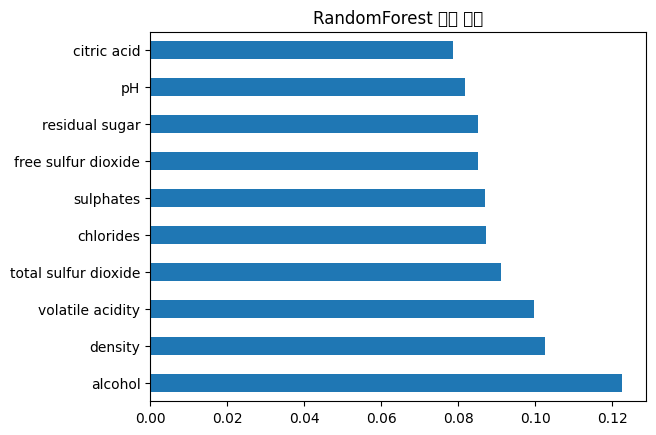

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

best_rf = grid_rf.best_estimator_
feat_imp = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("RandomForest 중요 변수")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


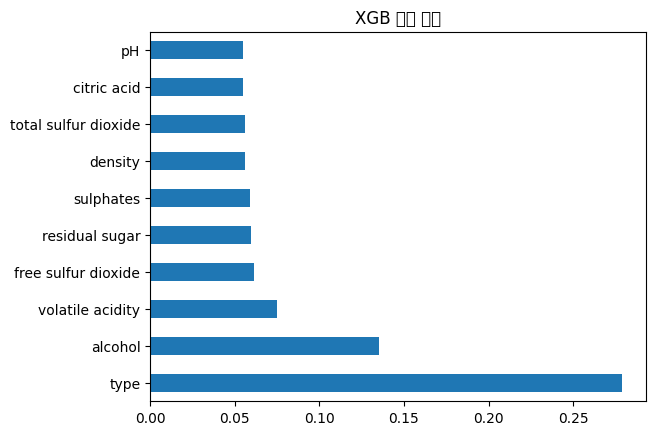

In [ ]:
best_xgb = random_xgb.best_estimator_
feat_imp2 = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
feat_imp2.nlargest(10).plot(kind='barh')
plt.title("XGB 중요 변수")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


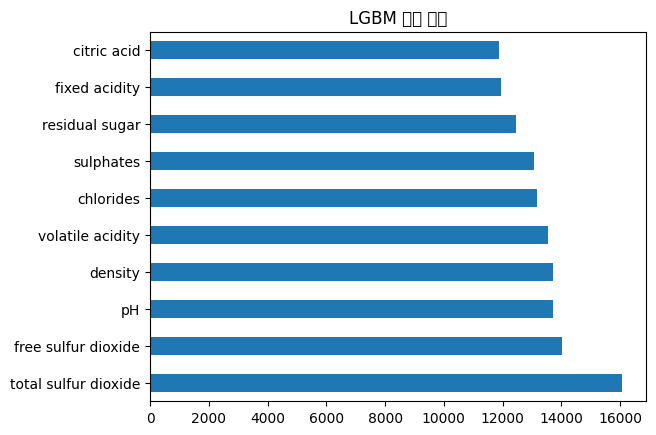

In [ ]:
best_lgbm = random_lgbm.best_estimator_
feat_imp3 = pd.Series(best_lgbm.feature_importances_, index=X_train.columns)
feat_imp3.nlargest(10).plot(kind='barh')
plt.title("LGBM 중요 변수")
plt.show()

In [ ]:
## CV의 결과가 큰 차이가 없어 추가적인 전처리 적용
### type 제거, sulfur log 변환, 낮은 corr 변수 제거

from sklearn.preprocessing import MinMaxScaler


def preprocess(X_train, X_test, y_train):
    X_train_proc = X_train.copy()
    X_test_proc = X_test.copy()

    # type 제거 내용
    if 'type' in X_train_proc.columns:
        X_train_proc.drop(columns=['type'], inplace=True)
        X_test_proc.drop(columns=['type'], inplace=True)

    # sulfur 부분 log 변환
    sulfur_cols = ['total sulfur dioxide', 'free sulfur dioxide']
    for col in sulfur_cols:
        X_train_proc[f'{col}_log'] = np.log1p(X_train_proc[col])
        X_test_proc[f'{col}_log'] = np.log1p(X_test_proc[col])
        X_train_proc.drop(columns=[col], inplace=True)
        X_test_proc.drop(columns=[col], inplace=True)

    # 낮은 corr 변수 제거
    correlations = pd.concat([X_train, y_train], axis=1).corr()
    corr_with_target = correlations['quality'].abs().sort_values(ascending=False)
    low_corr_features = corr_with_target[corr_with_target < 0.05].index.tolist()
    low_corr_features = [col for col in low_corr_features if col in X_train_proc.columns]

    X_train_proc.drop(columns=low_corr_features, inplace=True)
    X_test_proc.drop(columns=low_corr_features, inplace=True)

    return X_train_proc, X_test_proc


In [ ]:
X_train_proc, X_test_proc = preprocess(X_train, X_test, y_train)


In [ ]:
from sklearn.linear_model import LogisticRegression

rf2 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=156)
lgbm2 = LGBMClassifier(n_estimators=200, num_leaves=31, learning_rate=0.1, random_state=156)
xgb2 = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=156, eval_metric='mlogloss')
meta_model = LogisticRegression(max_iter=1000, random_state=156)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier

voting_clf = VotingClassifier(estimators=[
    ('rf', rf2),
    ('lgbm', lgbm2),
    ('xgb', xgb2)
], voting='soft')

voting_scores = cross_val_score(voting_clf, X_train_proc, y_train, cv=5, scoring='accuracy')
print("\n VotingClassifier 평균 정확도:", voting_scores.mean())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 8
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.391465
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.821849
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

In [ ]:
stacking_clf = StackingClassifier(estimators=[
    ('rf', rf2),
    ('lgbm', lgbm2),
    ('xgb', xgb2)
], final_estimator=meta_model, passthrough=False, cv=5)

stacking_scores = cross_val_score(stacking_clf, X_train_proc, y_train, cv=5, scoring='accuracy')
print("\n StackingClassifier 평균 정확도:", stacking_scores.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1083
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 8
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.391465
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.821849
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1059
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 8
[LightGBM] [Info] Start training from score -5.392775
[LightGBM] [Info] Start training from score -3.394679
[LightGBM] [Info] Start training from score -1.123077
[LightGBM] [Info] Start training from score -0.821291
[LightGBM] [Info] Start training from score -1.781857
[LightGBM] [Info] Start training from score -3.590653
[LightGBM] [Info] Start training from score -7.066751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1099
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 8
[LightGBM] [Info] Start training from score -5.392945
[LightGBM] [Info] Start training from score -3.384731
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.821849
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 8
[LightGBM] [Info] Start training from score -5.392775
[LightGBM] [Info] Start training from score -3.386240
[LightGBM] [Info] Start training from score -1.123077
[LightGBM] [Info] Start training from score -0.821937
[LightGBM] [Info] Start training from score -1.783548
[LightGBM] [Info] Start training from score -3.580396
[LightGBM] [Info] Start training from score -7.066751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1085
[LightGBM] [Info] Number of data points in the train set: 4398, number of used features: 8
[LightGBM] [Info] Start training from score -5.344383
[LightGBM] [Info] Start training from score -3.384959
[LightGBM] [Info] Start training from score -1.123475
[LightGBM] [Info] Start training from score -0.822077
[LightGBM] [Info] Start training from score -1.783607
[LightGBM] [Info] Start training from score -3.584884
[LightGBM] [Info] Start training from score -7.002611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1043
[LightGBM] [Info] Number of data points in the train set: 3518, number of used features: 8
[LightGBM] [Info] Start training from score -5.332435
[LightGBM] [Info] Start training from score -3.386524
[LightGBM] [Info] Start training from score -1.123362
[LightGBM] [Info] Start training from score -0.822222
[LightGBM] [Info] Start training from score -1.783832
[LightGBM] [Info] Start training from score -3.580680
[LightGBM] [Info] Start training from score -7.067036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1094
[LightGBM] [Info] Number of data points in the train set: 4398, number of used features: 8
[LightGBM] [Info] Start training from score -5.344383
[LightGBM] [Info] Start training from score -3.384959
[LightGBM] [Info] Start training from score -1.122776
[LightGBM] [Info] Start training from score -0.822594
[LightGBM] [Info] Start training from score -1.782255
[LightGBM] [Info] Start training from score -3.593115
[LightGBM] [Info] Start training from score -7.002611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 3518, number of used features: 8
[LightGBM] [Info] Start training from score -5.332435
[LightGBM] [Info] Start training from score -3.386524
[LightGBM] [Info] Start training from score -1.123362
[LightGBM] [Info] Start training from score -0.822222
[LightGBM] [Info] Start training from score -1.782141
[LightGBM] [Info] Start training from score -3.590937
[LightGBM] [Info] Start training from score -7.067036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 4398, number of used features: 8
[LightGBM] [Info] Start training from score -5.344383
[LightGBM] [Info] Start training from score -3.384959
[LightGBM] [Info] Start training from score -1.122776
[LightGBM] [Info] Start training from score -0.822077
[LightGBM] [Info] Start training from score -1.783607
[LightGBM] [Info] Start training from score -3.593115
[LightGBM] [Info] Start training from score -7.002611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 3518, number of used features: 8
[LightGBM] [Info] Start training from score -5.332435
[LightGBM] [Info] Start training from score -3.386524
[LightGBM] [Info] Start training from score -1.123362
[LightGBM] [Info] Start training from score -0.821575
[LightGBM] [Info] Start training from score -1.783832
[LightGBM] [Info] Start training from score -3.590937
[LightGBM] [Info] Start training from score -7.067036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



 StackingClassifier 평균 정확도: 0.653806435602614


In [ ]:
voting_clf.fit(X_train_proc, y_train)
stacking_clf.fit(X_train_proc, y_train)

voting_preds = voting_clf.predict(X_test_proc)
stacking_preds = stacking_clf.predict(X_test_proc)

In [ ]:
## RF가 성능이 가장 좋게 나와서 파라미터 튜닝을 더 시도

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [15, 20, 25, 30, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(rf,
                                    param_distributions=param_dist,
                                    n_iter=50,
                                    cv=3,
                                    scoring='accuracy',
                                    n_jobs=-1,
                                    random_state=42,
                                    verbose=2)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Best CV Score: 0.6554468815687807


In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score


scaler3 = MinMaxScaler()

X_train_scaled = scaler3.fit_transform(X_train)
X_test_scaled = scaler3.transform(X_test)



rf_best=RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2,n_estimators=300,random_state=156)
rf_best_2=RandomForestClassifier(max_depth=20, min_samples_split=2,n_estimators=300,random_state=156)

## 지원님이 주신 파라미터
##  rf_best=RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2,n_estimators=300,random_state=156)

svc = SVC(probability=True, kernel='rbf', C=1.0, random_state=156)
knn = KNeighborsClassifier(n_neighbors=5)


meta_model = LogisticRegression(max_iter=1000, random_state=156)

stacking_clf_1 = StackingClassifier(
    estimators=[
        ('rf', rf_best_2),
        ('svc', svc),
        ('knn', knn)
    ],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=False
)


stacking_scores_1 = cross_val_score(stacking_clf_1, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n StackingClassifier 평균 정확도:", stacking_scores_1.mean())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



 StackingClassifier 평균 정확도: 0.6767289271238315


RF를 보완할 수 있는 모델들을 좀 찾아봤는데,
LogisticRegression, Support Vector Classifier, KNeighborsClassifier, CatBoostClassifier, GBM이 있음.

Base Learner과 Meta Learner
RF,XGB,KNN     LogisticRegression 조합
RF,LGBM,SVC    GBM 조합


RF, SVC, KNN / LR 이용 조합
RF,LR,SVC  / LR 이용 조합
RF, CatBoost, KNN / LR 조합

In [ ]:
# 조합 2: RF + LR + SVC → meta: LR


lr = LogisticRegression(max_iter=1000, random_state=156)
svc = SVC(probability=True, kernel='rbf', C=1.0, random_state=156)

stacking_clf_2 = StackingClassifier(
    estimators=[
        ('rf', rf_best),
        ('lr', lr),
        ('svc', svc)
    ],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

stacking_scores_2 = cross_val_score(stacking_clf_2, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n 조합 2 - RF+LR+SVC 평균 정확도:", stacking_scores_2.mean())


 조합 2 - RF+LR+SVC 평균 정확도: 0.6790925634874678


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
# 조합 3: RF + CatBoost + KNN → meta: LR
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0, random_state=156)
knn = KNeighborsClassifier(n_neighbors=5)

stacking_clf_3 = StackingClassifier(
    estimators=[
        ('rf', rf_best),
        ('cat', catboost),
        ('knn', knn)
    ],
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

stacking_scores_3 = cross_val_score(stacking_clf_3, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n 조합 3 - RF+CatBoost+KNN 평균 정확도:", stacking_scores_3.mean())


 조합 3 - RF+CatBoost+KNN 평균 정확도: 0.6783664488377864


In [ ]:
# 세부 조정 1 _ 모델 2 : SVC 조정 + meta 변경
from sklearn.model_selection import GridSearchCV

svc_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

svc_grid = GridSearchCV(SVC(probability=True), svc_param_grid, cv=3, n_jobs=-1)
svc_grid.fit(X_train_scaled, y_train)
svc_best = svc_grid.best_estimator_
print("\n Best SVC Params:", svc_grid.best_params_)


 Best SVC Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

svc_best = SVC(C=10, gamma='scale', kernel='rbf', probability=True, random_state=156)

meta_model_gb = GradientBoostingClassifier(n_estimators=100, random_state=156)

stacking_clf_tuned = StackingClassifier(
    estimators=[
        ('rf', rf_best_2),
        ('svc', svc_best)
    ],
    final_estimator=meta_model_gb,
    cv=5,
    n_jobs=-1
)

scores = cross_val_score(stacking_clf_tuned, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n 튜닝된 StackingClassifier 평균 정확도:", scores.mean())


 튜닝된 StackingClassifier 평균 정확도: 0.6623548680618744


In [ ]:
# 세부 조정 2 _ 모델 2 : SVC 조정

meta_model_lr = LogisticRegression(max_iter=1000, random_state=156)

lr_base = LogisticRegression(max_iter=1000, random_state=156)

stacking_svc_tuned = StackingClassifier(
    estimators=[
        ('rf', rf_best_2),
        ('lr', lr_base),
        ('svc', svc_best)
    ],
    final_estimator=meta_model_lr,
    cv=5,
    n_jobs=-1
)

scores_svc_tuned = cross_val_score(stacking_svc_tuned, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n (1) 조합 2 - 튜닝된 SVC 사용 평균 정확도:", scores_svc_tuned.mean())


 (1) 조합 2 - 튜닝된 SVC 사용 평균 정확도: 0.6765469435023576


In [ ]:
# 세부 조정 2 _ 모델 2 : meta 모델 변경


lr_base2 = LogisticRegression(max_iter=1000, random_state=156)
svc_base = SVC(probability=True, kernel='rbf', C=1.0, random_state=156)
meta_gb = GradientBoostingClassifier(n_estimators=100, random_state=156)


stacking_meta_gb = StackingClassifier(
    estimators=[
        ('rf', rf_best_2),
        ('lr', lr_base2),
        ('svc', svc_base)
    ],
    final_estimator=meta_gb,
    cv=5,
    n_jobs=-1
)
scores_meta_gb = cross_val_score(stacking_meta_gb, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\n (2) 조합 2 - 메타 모델 GBC 사용 평균 정확도:", scores_meta_gb.mean())


 (2) 조합 2 - 메타 모델 GBC 사용 평균 정확도: 0.6638133840681611


In [ ]:
# 1번

import pandas as pd
file_path = '/content/drive/MyDrive/ESAA/sample_submission.csv'

submission1 = pd.read_csv(file_path)

stacking_clf_1.fit(X_train_scaled, y_train)
preds1 = stacking_clf_1.predict(X_test_scaled)

submission1['quality'] = preds1

submission1.to_csv('/content/drive/MyDrive/ESAA/sample_submission_1.csv', index=False)

In [ ]:
# 2번

submission2 = pd.read_csv(file_path)

stacking_clf_2.fit(X_train_scaled, y_train)
preds2 = stacking_clf_2.predict(X_test_scaled)

submission2['quality'] = preds2

submission2.to_csv('/content/drive/MyDrive/ESAA/sample_submission_2.csv', index=False)

In [ ]:
# 3번
submission3 = pd.read_csv(file_path)

stacking_clf_3.fit(X_train_scaled, y_train)
preds3 = stacking_clf_3.predict(X_test_scaled)

submission3['quality'] = preds3

submission3.to_csv('/content/drive/MyDrive/ESAA/sample_submission_3.csv', index=False)

In [ ]:
# 4번
submission4 = pd.read_csv(file_path)

stacking_clf_tuned.fit(X_train_scaled, y_train)
preds4 = stacking_clf_tuned.predict(X_test_scaled)

submission4['quality'] = preds4

submission4.to_csv('/content/drive/MyDrive/ESAA/sample_submission_4.csv', index=False)

In [ ]:
# 5번
submission5 = pd.read_csv(file_path)

stacking_svc_tuned.fit(X_train_scaled, y_train)
preds5 = stacking_svc_tuned.predict(X_test_scaled)

submission5['quality'] = preds5

submission5.to_csv('/content/drive/MyDrive/ESAA/sample_submission_5.csv', index=False)

In [ ]:
# 6번
submission6 = pd.read_csv(file_path)

stacking_meta_gb.fit(X_train_scaled, y_train)
preds6 = stacking_meta_gb.predict(X_test_scaled)

submission6['quality'] = preds6

submission6.to_csv('/content/drive/MyDrive/ESAA/sample_submission_6.csv', index=False)

In [ ]:
print(encoder.classes_)  # 어떤 클래스가 어떤 숫자로 매핑됐는지 확인


['red' 'white']


In [ ]:
df_submission.to_csv("submission_rf.csv", index=False)
